In [1]:
#Import The Libraries 

In [2]:
#!pip install scikeras

In [3]:
#!pip install --upgrade numpy pandas

In [4]:
#!pip install --upgrade matplotlib

In [5]:
#!pip install pandas==2.1.4

In [6]:
#!pip install numpy==1.26.3

In [7]:
#!pip install scikeras

In [8]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [9]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [10]:
X_train_digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train_digit[14]

1

In [14]:
#Data Visulization as images

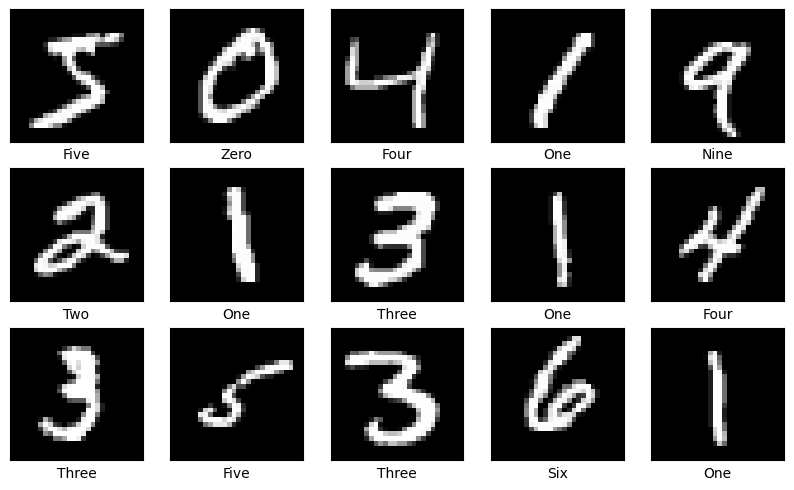

In [15]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

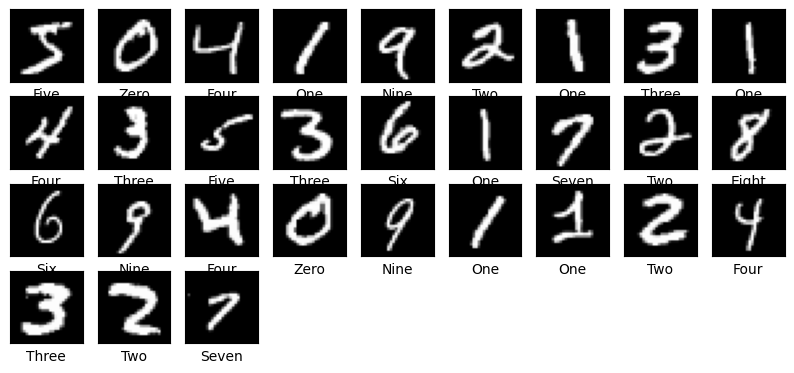

In [16]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(9,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [17]:
#In this we are having 3 dimensions , in ANN 2 dimensions should be there.
#So we have to pre-process 3D to 2D by re-shapping

In [18]:
X_train_digit.shape

(60000, 28, 28)

In [19]:
pd.read_csv('fashion-mnist_test.csv')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#Preprocessing the input-Converting 3d to 2d

In [21]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [22]:
X_train_digit.shape

(60000, 784)

In [23]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [25]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [26]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Explanation Sequential rule'
#Basic formula for Interview Questions for ANN Using Bodmas Rule:

#"Dense Layers" for ANN-Artificial Neural Network for Parameters(Param_number)

#According to Bodmas rule,
#B-Bracket, O-order, D-Division, M-Multiplication, A-addition, S-Subtraction.

#Bodmas Understanding concepts,
#"BODMAS rule is used to evaluate mathematical expressions and to deal with complex calculations in a much easier and to make it as a standard way".

#Bodmas Rule example,
#Explanation:Simplify the expression using BODMAS.

#Formula for:param_number = output_channel_number * (input_channel_number + 1)
#256*(784+1)

#Solution:
#Let us solve 256(784+1) step by step.
#Input value:256
#Here 784 is Rows & Columns i.e 28*28=784
#Step 1: We need to solve the brackets first. So, 256 * (784 + 1) = 256 * 785
#Step 2: This will result in256 *785 = 200,960

#Finally we need to calculate total parameters:
# " 200960 + 16448 + 4160 + 650 = '222,218' " 

In [30]:
#https://keras.io/api/
#Pls refer the above link for compiling the model for ANN for "Optimizer" & "Metrics"
#"Optimizer":SGD ,RMS, prop ,Adam, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam, Ftrl, Lion, Loss Scale Optimizer
#"Metrics" : Base Metric, classAccuracy metrics ,Probabilistic metrics,Regression metrics, Classification metrics based on True/False positives & negativesImage segmentation metricsHinge metrics for "maximum-margin" classificationMetric wrappers and reduction metrics
#Here we compile for "Optimizer":"Adam"
                #   "Metrics ":"accuracy"
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [31]:
#Using "FIT"Method 
#Once we using fit Method We give Input process
#(i.e) ! 1 Epoch means : complete a Freeforward and Backpropagation process 

In [32]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7702 - loss: 4.5841 - val_accuracy: 0.9274 - val_loss: 0.2801
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9342 - loss: 0.2524 - val_accuracy: 0.9387 - val_loss: 0.2368
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9528 - loss: 0.1684 - val_accuracy: 0.9447 - val_loss: 0.2004
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9639 - loss: 0.1226 - val_accuracy: 0.9551 - val_loss: 0.1858
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.1069 - val_accuracy: 0.9615 - val_loss: 0.1499
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9734 - loss: 0.0889 - val_accuracy: 0.9600 - val_loss: 0.1642
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9731 - loss: 0.0889 - val_accuracy: 0.9627 - val_loss: 0.1546
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9776 - loss: 0.0772 - val_accuracy: 0.

In [33]:
#For ex : Suppose we never get final output is not accurate value, 
#So we ned to change the compile in "Optimizer" & "Metrics"

In [34]:
#Here for some undserstanding Purpose
#Creating base neural network
#model = keras.Sequential([
    #layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #layers.Dense(10,activation='sigmoid'),])
    #Meaning of layers.dropout = layers.Dropout(0.3), Epoch 1 Accuracy Value: 0.7690 -0.3 =0.4690

In [35]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9592 - loss: 0.1861


In [36]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9635


In [37]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [38]:
y_predict[0]

array([1.01946096e-03, 9.99651074e-01, 9.99968052e-01, 9.99997079e-01,
       1.05496898e-01, 1.05651236e-06, 1.13308654e-10, 1.00000000e+00,
       3.52426767e-01, 9.99961138e-01], dtype=float32)

In [39]:
# Here we get the index of maximum value in the encoded vector
#Vector means: only for measurement
#Scalar means: Uusing total the entire row (i.e more than 1 values i.e array of output)
y_predicts=np.argmax(y_predict, axis=1) 

In [40]:
#After conversion of input ,output to be preprocess in readable way.

In [41]:
#Below one is Actual Test data
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [42]:
#Output having numerical it is not able to readble
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
y_predicts[1], y_predicts[0]

(2, 7)

In [44]:
#Predicted Value data
y_pre=pd.DataFrame(y_predicts)

In [45]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [46]:
import seaborn as sns

In [47]:
#!pip install deep

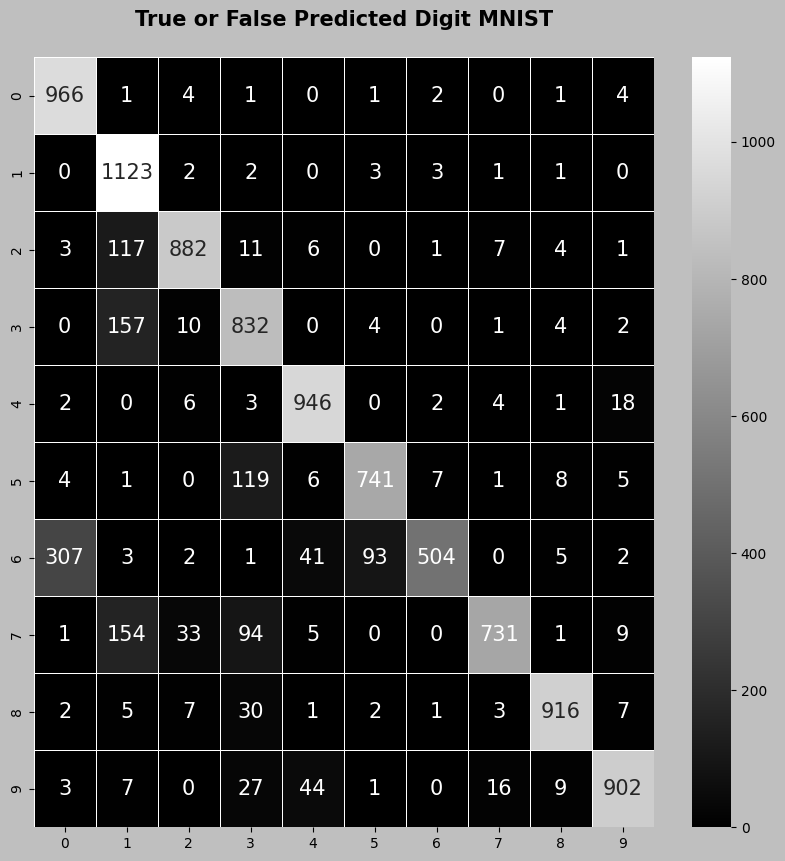

In [48]:
#Assuming y_test_digit_eval and y_predicts are defined
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use("grayscale")
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False Predicted Digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       980
           1       0.72      0.99      0.83      1135
           2       0.93      0.85      0.89      1032
           3       0.74      0.82      0.78      1010
           4       0.90      0.96      0.93       982
           5       0.88      0.83      0.85       892
           6       0.97      0.53      0.68       958
           7       0.96      0.71      0.82      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.89      0.92      1009

    accuracy                           0.85     10000
   macro avg       0.88      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



In [50]:
#Best F1-Score is '6'-0.97
#Over all accuracy is 0.78

In [51]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


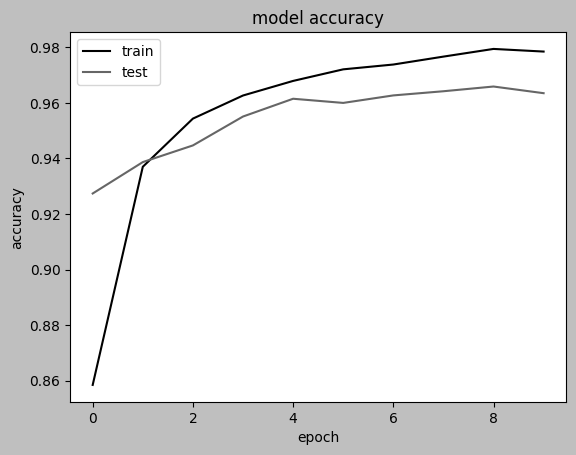

In [52]:
# summarize history for "accuracy"
#Accuracy graph everytime decreases to Increases(i.e- we need to find out the good Model)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

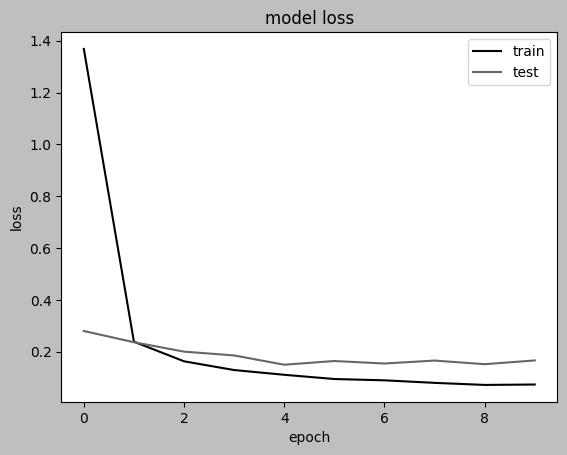

In [53]:
# summarize history for "Loss"
# Loss Graph everytime higher level to Lower Level(to minimize the errors)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [54]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [55]:
y_predicts_single[0]

1

In [56]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

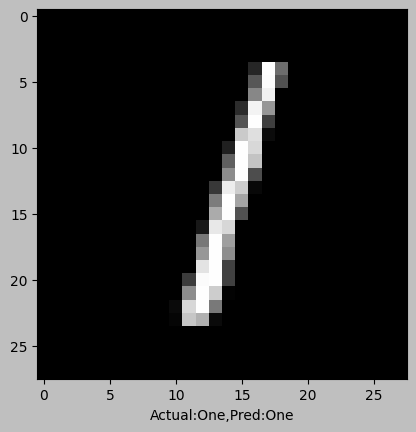

In [57]:
#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
#Here understandig purpose(28*28-Matrix 784*we need to reshaped)
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()